# A Discrete Switching System

A la multi-hypothesis-smoother (MHS), but all discrete.


GTSAM Copyright 2010-2022, Georgia Tech Research Corporation,
Atlanta, Georgia 30332-0415
All Rights Reserved

Authors: Frank Dellaert, et al. (see THANKS for the full author list)

See LICENSE for the license information

<a href="https://colab.research.google.com/github/borglab/gtsam/blob/develop/python/gtsam/examples/DiscreteSwitching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This needs gtbook:
% pip install --quiet gtbook

In [ ]:
from gtsam import DiscreteBayesNet, DiscreteKeys, DiscreteFactorGraph, Ordering
from gtsam.symbol_shorthand import S
from gtsam.symbol_shorthand import M

In [2]:
def P(*args):
    """ Create a DiscreteKeys instances from a variable number of DiscreteKey pairs."""
    # TODO: We can make life easier by providing variable argument functions in C++ itself.
    dks = DiscreteKeys()
    for key in args:
        dks.push_back(key)
    return dks


In [3]:
import graphviz


class show(graphviz.Source):
    """ Display an object with a dot method as a graph."""

    def __init__(self, obj):
        """Construct from object with 'dot' method."""
        # This small class takes an object, calls its dot function, and uses the
        # resulting string to initialize a graphviz.Source instance. This in turn
        # has a _repr_mimebundle_ method, which then renders it in the notebook.
        super().__init__(obj.dot())


In [4]:
nrStates = 3
K = 5

bayesNet = DiscreteBayesNet()
for k in range(1, K):
    key = S(k), nrStates
    key_plus = S(k+1), nrStates
    mode = M(k), 2
    bayesNet.add(key_plus, P(mode, key), "9/1/0 1/8/1 0/1/9  1/9/0 0/1/9 9/0/1")

bayesNet

m1,s1,0,1,2
0,0,0.9,0.1,0
0,1,0.1,0.8,0.1
0,2,0,0.1,0.9
1,0,0.1,0.9,0
1,1,0,0.1,0.9
1,2,0.9,0,0.1
m2,s2,0,1,2
0,0,0.9,0.1,0
0,1,0.1,0.8,0.1
0,2,0,0.1,0.9


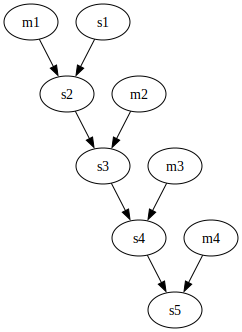

In [5]:
show(bayesNet)

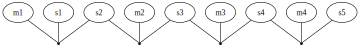

In [6]:
# Create a factor graph out of the Bayes net.
factorGraph = DiscreteFactorGraph(bayesNet)
show(factorGraph)

In [9]:
# Create a BayesTree out of the factor graph.
ordering = Ordering()
# First eliminate "continuous" states in time order
for k in range(1, K+1):
    ordering.push_back(S(k))
for k in range(1, K):
    ordering.push_back(M(k))
print(ordering)
bayesTree = factorGraph.eliminateMultifrontal(ordering)

Position 0: s1, s2, s3, s4, s5, m1, m2, m3, m4



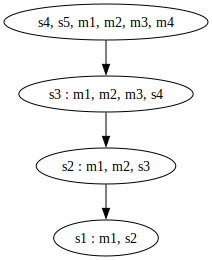

In [8]:
show(bayesTree)